<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/osc_dyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Oscillatory Systems

## What Is an Oscillator?

An **oscillator** is a dynamical system that undergoes repeated motion, either exactly or approximately, over time. In its most general form, an oscillator evolves under deterministic laws and returns to a similar or identical configuration after some characteristic time interval known as the **period**.

Mathematically, a function $x(t)$ is **periodic** with period $T > 0$ if:

$$
x(t + T) = x(t) \quad \forall t \in \mathbb{R}
$$

Oscillators are found in many domains — from mechanical systems and electrical circuits to biological rhythms and chemical reactions. The variable $x(t)$ may represent physical position, voltage, concentration, or any quantity that evolves with time.

At their core, oscillators are governed by ordinary differential equations (ODEs). A broad class of oscillatory systems can be described by second-order equations of the form:

$$
\frac{d^2x}{dt^2} + f(x, \dot{x}, t) = 0
$$

When the function $f$ is linear in $x$ and $\dot{x}$, the system is said to be **linear**. A prototypical linear oscillator is described by:

$$
\frac{d^2x}{dt^2} + \omega^2 x = 0
$$

where $\omega$ is the **natural angular frequency** of the system. Solutions to this equation are sinusoidal and exhibit constant frequency regardless of amplitude — a hallmark of linearity. However, most real-world oscillators are **nonlinear**, especially at larger amplitudes or when external forces and feedback are introduced. Nonlinear systems often exhibit richer dynamics, including amplitude-dependent frequency, waveform distortion, and in some cases, chaotic behavior.




# The Simple Pendulum: Linear and Nonlinear Dynamics

## 1. Introduction

The simple pendulum is a foundational system in classical mechanics. It consists of a point mass $m$ suspended from a fixed pivot by a massless, rigid rod of length $L$, oscillating under the influence of gravity. The angle $\theta(t)$, measured from the vertical, fully describes its motion.

While for small oscillations the system behaves like a linear harmonic oscillator, the full behavior is governed by a nonlinear differential equation. This section develops both the linearized and nonlinear models, explains their derivation, and discusses when more advanced tools like elliptic integrals are necessary.

## 2. Deriving the Equation of Motion

We begin by applying **Newton’s second law** in rotational form:

$$
\tau = I \alpha
$$

Where:

* $\tau$ is the torque acting on the pendulum,
* $I = mL^2$ is the moment of inertia about the pivot,
* $\alpha = \frac{d^2\theta}{dt^2} = \ddot{\theta}$ is the angular acceleration.

The torque due to gravity is given by the tangential component of the gravitational force:

$$
\tau = -mgL \sin\theta
$$

Here, the minus sign reflects that the torque acts in the direction opposite to $\theta$, seeking to restore the pendulum to its equilibrium position.

Substituting into the equation of motion:

$$
- mgL \sin\theta = mL^2 \ddot{\theta}
$$

Dividing both sides by $mL^2$, we obtain the nonlinear second-order differential equation:

$$
\ddot{\theta} + \frac{g}{L} \sin\theta = 0
$$

This is the **nonlinear pendulum equation**. It accurately describes the motion for **any amplitude** of oscillation.

## 3. Linearization for Small Angles

For small angular displacements $\theta \ll 1$, we may use the **small-angle approximation**:

$$
\sin\theta \approx \theta
$$

This simplifies the nonlinear equation to:

$$
\ddot{\theta} + \frac{g}{L} \theta = 0
$$

This is the well-known equation for **simple harmonic motion** (SHM). Its solution is:

$$
\theta(t) = \theta_0 \cos(\omega_0 t + \phi)
$$

where:

* $\theta_0$ is the amplitude,
* $\omega_0 = \sqrt{\frac{g}{L}}$ is the natural frequency,
* $\phi$ is the phase offset.

This model works well when $\theta_0 < 10^\circ$, beyond which the approximation becomes inaccurate.

## 4. Numerical Simulation

When working with moderate or large angles (e.g., $30^\circ$, $90^\circ$, or beyond), the nonlinear effects become significant. Fortunately, modern numerical solvers like `solve_ivp` in Python's `scipy.integrate` library can handle the full nonlinear equation directly by numerically integrating:

$$
\frac{d\theta}{dt} = \omega \\
\frac{d\omega}{dt} = -\frac{g}{L} \sin\theta
$$

This system of first-order equations can be simulated to visualize and compare both the **linearized** and **nonlinear** models.

## 5. Exact Analytical Solution and Elliptic Integrals

The nonlinear pendulum equation does not admit a solution in terms of elementary functions. However, it **can** be solved using **elliptic functions** or **elliptic integrals**.

For example, if one seeks the **period** of the nonlinear pendulum (the time to complete one full swing), it is given by:

$$
T = 4 \sqrt{\frac{L}{g}} \int_0^{\pi/2} \frac{d\phi}{\sqrt{1 - k^2 \sin^2\phi}}
$$

where:

$$
k = \sin\left(\frac{\theta_0}{2}\right)
$$

This integral is known as the **complete elliptic integral of the first kind**, denoted $K(k)$, so we may write:

$$
T = 4 \sqrt{\frac{L}{g}} K(k)
$$

In contrast to the linear case where $T = 2\pi \sqrt{\frac{L}{g}}$ is constant, the **nonlinear period increases with amplitude**. This amplitude-dependence is a hallmark of nonlinear dynamics.

## 6. Summary of Models

| Feature             | Linearized Pendulum                      | Nonlinear Pendulum                           |
| ------------------- | ---------------------------------------- | -------------------------------------------- |
| Governing Equation  | $\ddot{\theta} + \frac{g}{L} \theta = 0$ | $\ddot{\theta} + \frac{g}{L} \sin\theta = 0$ |
| Assumptions         | $\theta \ll 1$                           | No approximation                             |
| Solution Type       | Sinusoidal                               | Requires numerical or elliptic solution      |
| Period              | Constant                                 | Increases with amplitude                     |
| Simulation Approach | Closed form or numeric                   | Numeric or elliptic integral-based           |

## 7. Conclusion

The simple pendulum provides a powerful example of the transition from **linear** to **nonlinear** dynamics. While the linear approximation is elegant and solvable with elementary functions, the true dynamics require a deeper understanding of trigonometric behavior and, for exact solutions, the use of elliptic integrals.

Nonetheless, the modern approach to solving such systems often leans on **numerical simulation**, which sidesteps analytic complexity and gives precise, visual insight into the system's behavior over time.


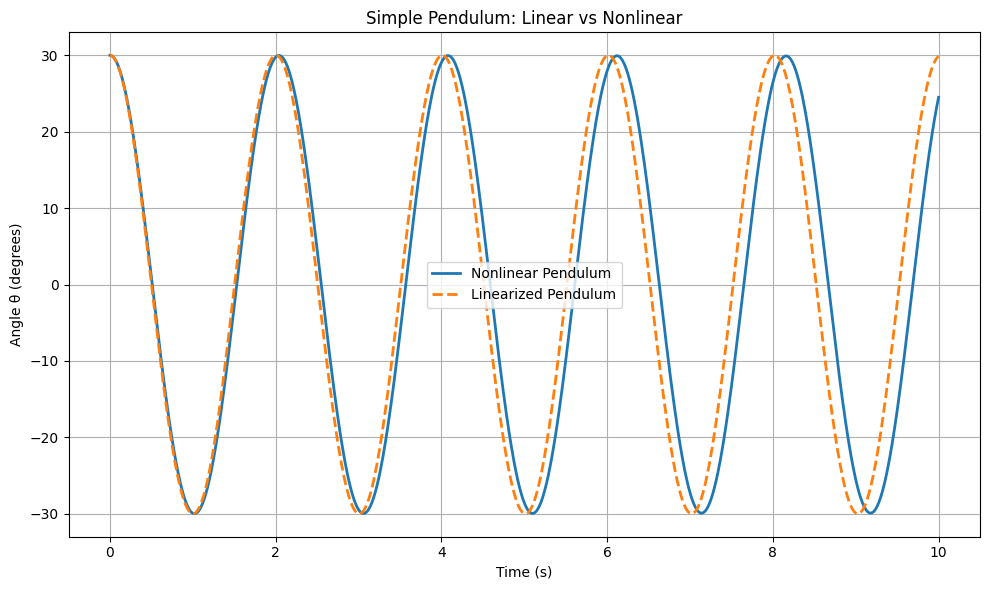

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81        # Acceleration due to gravity (m/s^2)
L = 1.0         # Length of pendulum (m)
omega0 = np.sqrt(g / L)  # Natural frequency (rad/s)

# Time range
t_span = (0, 10)                  # seconds
t_eval = np.linspace(*t_span, 1000)

# Initial conditions: [theta(0), theta_dot(0)]
theta0 = np.radians(30)  # Initial angle in radians (30 degrees)
omega0_initial = 0.0     # Initial angular velocity

y0 = [theta0, omega0_initial]

# --- Nonlinear pendulum: d²θ/dt² + (g/L) * sin(θ) = 0
def nonlinear_pendulum(t, y):
    theta, theta_dot = y
    dydt = [theta_dot, - (g / L) * np.sin(theta)]
    return dydt

# --- Linearized pendulum: d²θ/dt² + (g/L) * θ = 0
def linear_pendulum(t, y):
    theta, theta_dot = y
    dydt = [theta_dot, - (g / L) * theta]
    return dydt

# Solve both systems
sol_nl = solve_ivp(nonlinear_pendulum, t_span, y0, t_eval=t_eval)
sol_lin = solve_ivp(linear_pendulum, t_span, y0, t_eval=t_eval)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sol_nl.t, np.degrees(sol_nl.y[0]), label='Nonlinear Pendulum', linewidth=2)
plt.plot(sol_lin.t, np.degrees(sol_lin.y[0]), '--', label='Linearized Pendulum', linewidth=2)
plt.title('Simple Pendulum: Linear vs Nonlinear')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (degrees)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# The Mass-Spring System: Linear and Nonlinear Dynamics

## 1. Introduction

The mass-spring system is a canonical model in classical mechanics that captures the essence of oscillatory motion. It consists of a point mass $m$ attached to a spring of stiffness $k$, and its behavior illustrates fundamental principles of Newtonian dynamics, energy conservation, and resonance.

This chapter develops the full mathematical model of the system, beginning with the linear case (Hookean spring) and progressing to nonlinear extensions such as the Duffing oscillator. The nonlinear model introduces rich dynamics and leads to an exact analytical solution in terms of **Jacobi elliptic functions**, highlighting the connection between classical physics and advanced mathematical functions.

## 2. Linear Mass-Spring System

### 2.1 Newtonian Formulation

Consider a mass $m$ connected to a spring with stiffness $k$, displaced by $x(t)$ from its equilibrium position. According to Newton’s second law:

$$
F_{\text{net}} = m \ddot{x}
$$

The restoring force from the spring is given by **Hooke’s Law**:

$$
F_{\text{spring}} = -k x
$$

Substituting gives:

$$
m \ddot{x} = -k x
\quad \Rightarrow \quad
\ddot{x} + \omega_0^2 x = 0
\quad \text{with} \quad
\omega_0 = \sqrt{\frac{k}{m}}
$$

### 2.2 General Solution

This is the standard **simple harmonic oscillator (SHO)** equation, with general solution:

$$
x(t) = A \cos(\omega_0 t) + B \sin(\omega_0 t)
\quad \text{or} \quad
x(t) = x_0 \cos(\omega_0 t + \phi)
$$

The motion is:

* **Periodic** with constant amplitude,
* Frequency: $\omega_0 = \sqrt{\frac{k}{m}}$,
* Period: $T = \frac{2\pi}{\omega_0}$

## 3. Damped and Driven Extensions

### 3.1 Damped Oscillator

Adding damping proportional to velocity:

$$
\ddot{x} + 2\zeta \omega_0 \dot{x} + \omega_0^2 x = 0
$$

where $\zeta$ is the damping ratio. The system exhibits:

* Exponential decay (underdamped),
* Critical damping (fastest return to rest),
* Overdamped return (no oscillation).

### 3.2 Driven Oscillator

Adding a time-dependent external force:

$$
\ddot{x} + 2\zeta \omega_0 \dot{x} + \omega_0^2 x = \frac{F(t)}{m}
$$

For periodic forcing $F(t) = F_0 \cos(\omega t)$, the system shows resonance behavior.

## 4. Nonlinear Mass-Spring System: Duffing Oscillator

Real springs may not follow Hooke’s law exactly. To model more complex elasticity, we introduce a **cubic nonlinearity**:

$$
\ddot{x} + \omega_0^2 x + \alpha x^3 = 0
$$

This is the **Duffing equation** (conservative form). The behavior depends on the sign of $\alpha$:

* $\alpha > 0$: **Hardening spring** — stiffer at large displacements,
* $\alpha < 0$: **Softening spring** — less stiff at large displacements.

## 5. Deriving the Exact Nonlinear Solution

### 5.1 Energy Conservation

To find the exact solution, we multiply the Duffing equation by $\dot{x}$:

$$
\ddot{x} \dot{x} + \omega_0^2 x \dot{x} + \alpha x^3 \dot{x} = 0
\quad \Rightarrow \quad
\frac{d}{dt} \left( \frac{1}{2} \dot{x}^2 + \frac{1}{2} \omega_0^2 x^2 + \frac{1}{4} \alpha x^4 \right) = 0
$$

Define the **total mechanical energy**:

$$
E = \frac{1}{2} \dot{x}^2 + \frac{1}{2} \omega_0^2 x^2 + \frac{1}{4} \alpha x^4
$$

This is conserved in the absence of damping or forcing.

### 5.2 Separation of Variables

Solving for $\dot{x}$:

$$
\dot{x} = \pm \sqrt{2E - \omega_0^2 x^2 - \frac{1}{2} \alpha x^4}
$$

Separating variables:

$$
\frac{dx}{\sqrt{2E - \omega_0^2 x^2 - \frac{1}{2} \alpha x^4}} = \pm dt
$$

This integral defines the motion in **quadrature** form — a time-position relationship in integral form.

### 5.3 Elliptic Integral and Jacobi Functions

The integral:

$$
t = \int \frac{dx}{\sqrt{a + b x^2 + c x^4}}
$$

is a standard form of the **elliptic integral of the first kind**. Its solution is expressed using **Jacobi elliptic functions**:

$$
x(t) = A \cdot \text{cn}(\Omega t | m)
\quad \text{or} \quad
x(t) = A \cdot \text{sn}(\Omega t | m)
$$

Where:

* $A$ is the oscillation amplitude (related to energy $E$),
* $\Omega$ is an effective frequency that depends on amplitude,
* $m$ is the **elliptic modulus** (related to nonlinearity and amplitude).

These functions generalize sine and cosine to describe **nonlinear periodic** motion.

## 6. Comparison: Linear vs Nonlinear

| Feature            | Linear System                  | Nonlinear (Duffing) System                              |
| ------------------ | ------------------------------ | ------------------------------------------------------- |
| Governing Equation | $\ddot{x} + \omega_0^2 x = 0$  | $\ddot{x} + \omega_0^2 x + \alpha x^3 = 0$              |
| Solution           | Sinusoidal                     | Jacobi elliptic function (e.g., $\text{cn}, \text{sn}$) |
| Period             | Constant                       | Amplitude-dependent                                     |
| Energy             | Quadratic in $x, \dot{x}$      | Includes quartic term                                   |
| Behavior           | Symmetric, regular oscillation | Asymmetric, potential for bifurcations or chaos         |

## 7. Numerical Simulation

While the exact solution is elegant, most practical systems are best handled using **numerical integration**:

Convert to a first-order system:

$$
\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\omega_0^2 x - \alpha x^3
\end{cases}
$$

This system is suitable for integration with tools like `scipy.integrate.solve_ivp` or `odeint`.

## 8. Conclusion

The mass-spring system bridges the gap between **linear oscillations** and **nonlinear dynamics**. The inclusion of a cubic restoring force leads to the Duffing oscillator, which captures real-world stiffness and material effects. By invoking conservation of energy, the Duffing equation yields to exact analysis in terms of **Jacobi elliptic functions**. This connection illuminates a rich mathematical structure underlying even the simplest mechanical systems.

In practice, both the elegance of closed-form solutions and the power of numerical methods are essential for exploring and understanding nonlinear phenomena in physics and engineering.


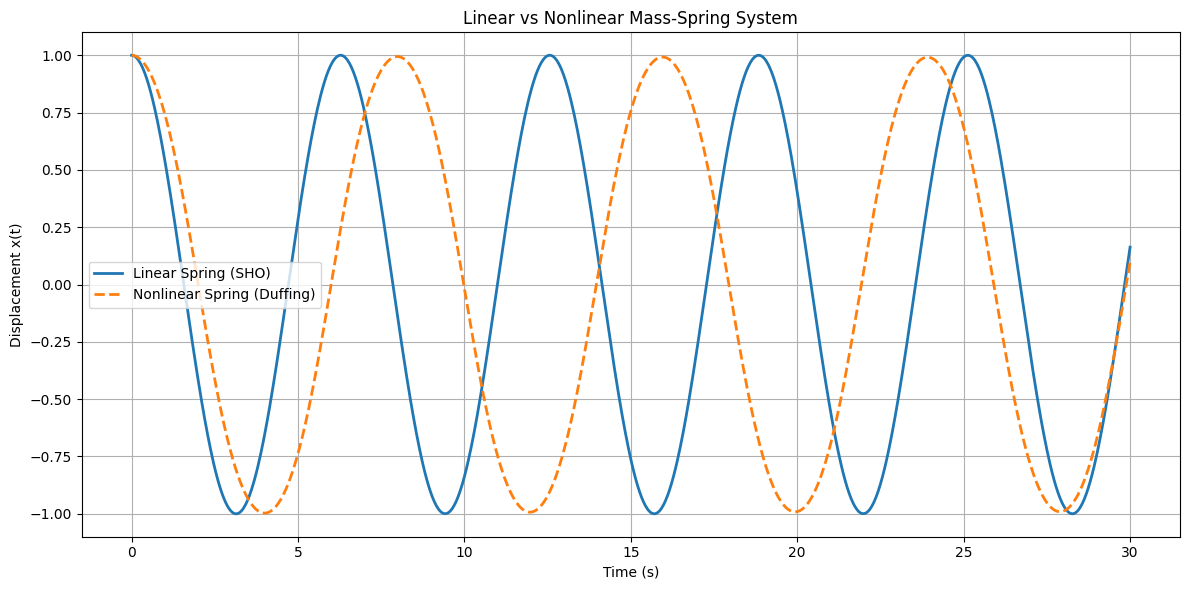

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
m = 1.0              # mass (kg)
k = 1.0              # linear spring constant (N/m)
alpha = -0.5         # cubic nonlinearity coefficient (Duffing: α<0 = soft spring)
omega0 = np.sqrt(k / m)

# Initial conditions
x0 = 1.0             # initial displacement (m)
v0 = 0.0             # initial velocity (m/s)
y0 = [x0, v0]

# Time span for simulation
t_span = (0, 30)
t_eval = np.linspace(*t_span, 1000)

# --- Linear spring: d²x/dt² + (k/m) * x = 0
def linear_spring(t, y):
    x, v = y
    dxdt = v
    dvdt = - (k / m) * x
    return [dxdt, dvdt]

# --- Nonlinear Duffing oscillator: d²x/dt² + (k/m) * x + (α/m) * x³ = 0
def nonlinear_spring(t, y):
    x, v = y
    dxdt = v
    dvdt = - (k / m) * x - (alpha / m) * x**3
    return [dxdt, dvdt]

# Solve both systems
sol_linear = solve_ivp(linear_spring, t_span, y0, t_eval=t_eval, method='RK45')
sol_nonlinear = solve_ivp(nonlinear_spring, t_span, y0, t_eval=t_eval, method='RK45')

# --- Plotting
plt.figure(figsize=(12, 6))
plt.plot(sol_linear.t, sol_linear.y[0], label='Linear Spring (SHO)', linewidth=2)
plt.plot(sol_nonlinear.t, sol_nonlinear.y[0], '--', label='Nonlinear Spring (Duffing)', linewidth=2)
plt.title('Linear vs Nonlinear Mass-Spring System')
plt.xlabel('Time (s)')
plt.ylabel('Displacement x(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
